In [1]:
import h5py
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import curve_fit
import cv2

# 1. Define Functions

In [2]:
# function to fit gaussian (not normalised)
def gaussian(x, a, mu, sigma):
    return a*np.exp(-(x-mu)**2/(2*sigma**2))

In [3]:
# Normalised Gauss Fit
def normalised_gauss(x, mu, sigma):
    ans = 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-(x-mu)**2/(2*sigma**2))
    return ans

In [4]:
#Load in Data function
def load_data(date,event_no,spectro_no):
    
    files = os.listdir('/eos/experiment/awake/event_data/'+date)
    f = h5py.File('/eos/experiment/awake/event_data/'+date+'/'+files[event_no],'r')
    data = f['AwakeEventData'][f'TCC4.SPECTRO'+str(spectro_no)+'.DigiCam']['ExtractionImage']['image2D'][1100:1200]
    protons= f['AwakeEventData']['TT41.BCTF.412340']['CaptureAcquisition']['totalIntensity'][0]
    
    return files, data, protons

In [7]:
def exponential(x, a, b):
    return a * np.exp(-b * x)

In [9]:
def check_flat(date,event_no,spectro_no):

    fit_parameters = []
    list_0_events = []
    pcovs_avg = []

    
    #fig,ax1 = plt.subplots(1,figsize=(15,5))

    for i in np.arange(0,1900,25):
        
        files,data,protons = load_data('2024/10/08',event_no,1)

        pixel_range = np.arange(0,4096,1)
        counts, bins, patches = ax1.hist(data.ravel(),4095,[1,4095], density = False, alpha=0.2)    

        popt, pcov = curve_fit(gaussian, bins[0:4095], counts)
        ax1.plot(pixel_range, gaussian(pixel_range, *popt), '-', color = 'purple', lw=1.5)

        fit_parameters.append(popt)
        perr = np.sqrt(np.diag(pcov))
        pcovs_avg.append(perr)
        list_0_events.append(i)

    mean_fit = np.mean(fit_parameters,axis=0)
    mean_error = np.mean(pcovs_avg,axis=0)

    #ax1.set_title('Off Screen Intensity Event'+str(event_no)+', Slices 25',fontsize=25)
    #ax1.set_xlabel('Intensity',fontsize=20)
    #ax1.set_ylabel('Pixel Count',fontsize=20)
    #ax1.set_xlim(-10,125)
    #ax1.tick_params(axis='both', which='major', labelsize=15)
    #ax1.legend()
    
    return mean_fit, mean_error, len(list_0_events)

In [6]:
## simple function to load in and plot spectrometer data
def subtract_sensor(date,event_no,spectro_no,mean):
    
    file = os.listdir('/eos/experiment/awake/event_data/'+date)
    f = h5py.File('/eos/experiment/awake/event_data/'+date+'/'+files[event_no],'r')
    
    plt.figure(figsize=(15,10))
    
    plt.title('Spectrometer Camera '+ str(spectro_no)+' Image, '+date,fontsize=25)
    plt.xlabel('X pixel number',fontsize=20)
    plt.ylabel('Y pixel number',fontsize=20)
    fig = np.array((f['AwakeEventData'][f'TCC4.SPECTRO'+str(spectro_no)+'.DigiCam']['ExtractionImage']['image2D'][:]))-mean
    
    return plt.imshow(fig,vmax=4095,cmap='Blues')

# 2. Get Gaussian Sensor Noise

/tmp/ipykernel_623/2969916000.py:2: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x)
/tmp/ipykernel_623/2969916000.py:2: RuntimeWarning: overflow encountered in multiply
  return a * np.exp(-b * x)


[5.48138242e+03 1.26354041e-01]
[1.18304894e+01 3.61950531e-04]
60


(-10.0, 125.0)

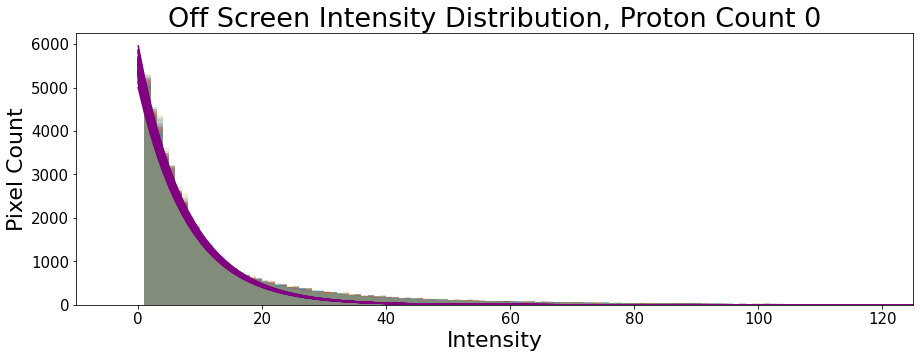

In [8]:
fit_parameters = []
list_0_events = []
pcovs_avg = []

fig,ax1 = plt.subplots(1,figsize=(15,5))
files = os.listdir('/eos/experiment/awake/event_data/'+'2024/10/08')

for i in np.arange(0,len(files),1):
    
    files,data,protons = load_data('2024/10/08',i,2)
    
    if protons == 0:
        pixel_range = np.arange(0,4096,1)
        counts, bins, patches = ax1.hist(data.ravel(),4095,[1,4095], density = False, alpha=0.2, label = 'Event '+str(i))    
    
        try:
            popt, pcov = curve_fit(exponential, bins[0:4095], counts)
            ax1.plot(pixel_range, exponential(pixel_range, *popt), '-', color = 'purple', lw=1.5)

            fit_parameters.append(popt)
            perr = np.sqrt(np.diag(pcov))
            pcovs_avg.append(perr)
            list_0_events.append(i)
        
        except:
            print('error',i)
            continue
        
mean_fit = np.mean(fit_parameters,axis=0)
mean_error = np.mean(pcovs_avg,axis=0)

print(mean_fit)
print(mean_error)
print(len(list_0_events))
                        
ax1.set_title('Off Screen Intensity Distribution, Proton Count 0',fontsize=27)
ax1.set_xlabel('Intensity',fontsize=22)
ax1.set_ylabel('Pixel Count',fontsize=22)
ax1.tick_params(axis='both', which='major', labelsize=15)
ax1.set_xlim(-10,125)
#ax1.legend()

In [8]:
## Check if Gaussian Noise Flat across sensor

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(array([7.33663620e+03, 4.43139723e+00, 1.12656964e+01]),
 array([15.31054109,  0.07668199,  0.05923377]),
 76)

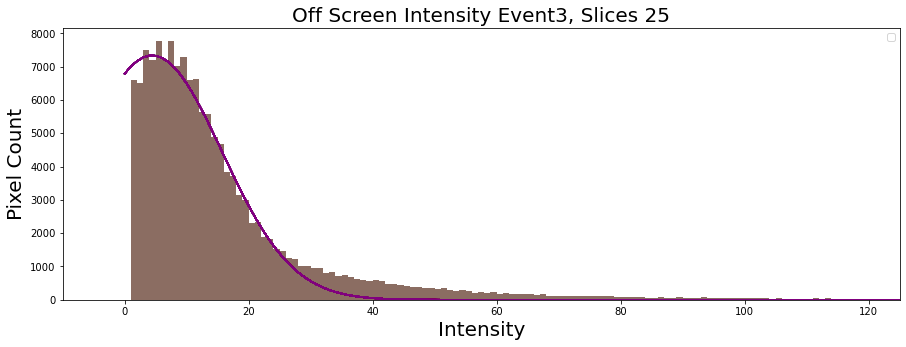

In [9]:
check_flat('2024/10/08',3,1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(array([7.38200058e+03, 3.83853830e+00, 1.15921986e+01]),
 array([16.00282581,  0.08407844,  0.06220852]),
 76)

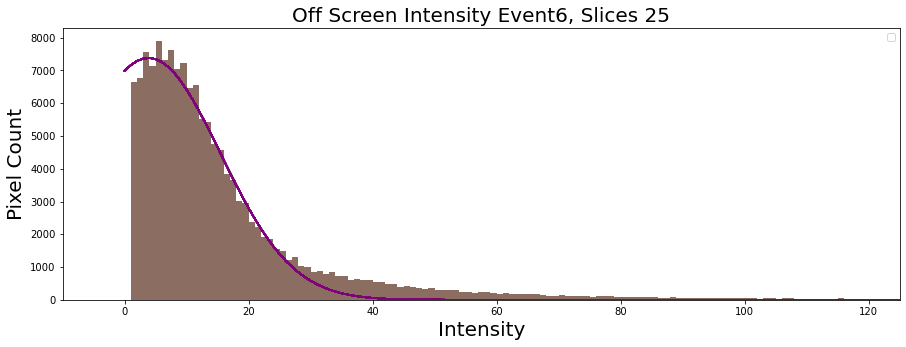

In [10]:
check_flat('2024/10/08',6,1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(array([7.36841808e+03, 3.72371205e+00, 1.15135080e+01]),
 array([16.77953126,  0.08788387,  0.0646539 ]),
 76)

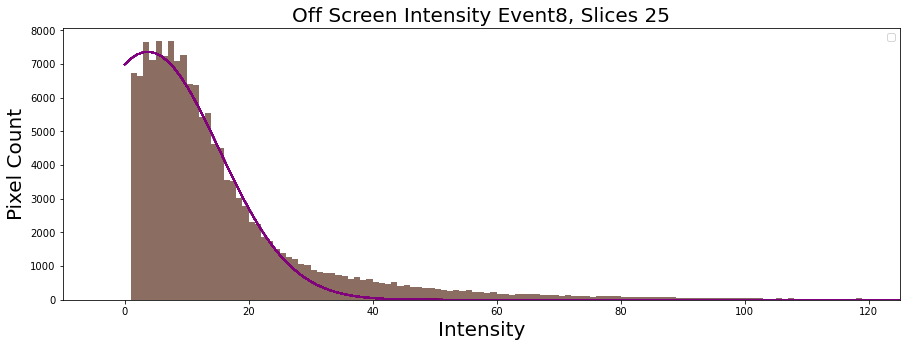

In [11]:
check_flat('2024/10/08',8,1)

In [12]:
## Compare Gaussians obtained for sensor noise

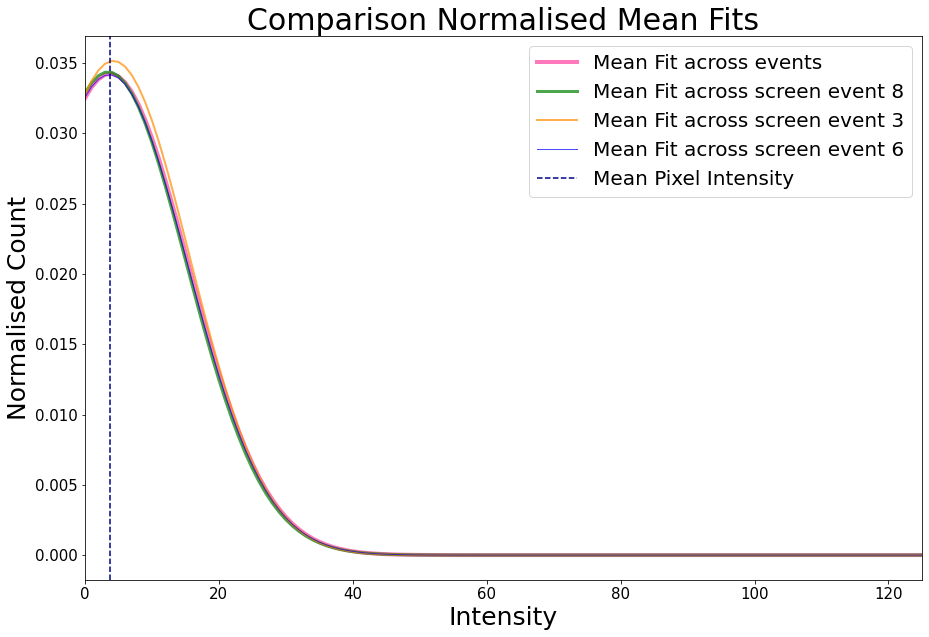

In [13]:
pixel_range = np.arange(0,4096,1)

plt.figure(figsize=(15,10))
plt.title('Comparison Normalised Mean Fits',fontsize=30)

plt.plot(pixel_range, normalised_gauss(pixel_range, 3.78126279e+00,1.16507223e+01), '-', alpha=0.9,color = 'hotpink', lw=4,label='Mean Fit across events')
plt.plot(pixel_range, normalised_gauss(pixel_range,3.47300737,11.60550717), '-',alpha=0.7,color = 'green', lw=3,label = 'Mean Fit across screen event 8')
plt.plot(pixel_range, normalised_gauss(pixel_range,4.24990764, 11.3461091), '-',alpha=0.7, color = 'darkorange', lw=2,label = 'Mean Fit across screen event 3')
plt.plot(pixel_range, normalised_gauss(pixel_range,3.64081406,11.6738803), '-', alpha=0.7,color = 'blue', lw=1,label = 'Mean Fit across screen event 6')
plt.axvline(x=3.78126279,linestyle='--',color='navy',label='Mean Pixel Intensity')

plt.tick_params(axis='both', which='major', labelsize=15)

plt.xlabel('Intensity',fontsize=25)
plt.ylabel('Normalised Count',fontsize=25)

plt.xlim(0,125)
plt.legend(fontsize=20)

# 3. Subtract Off Background

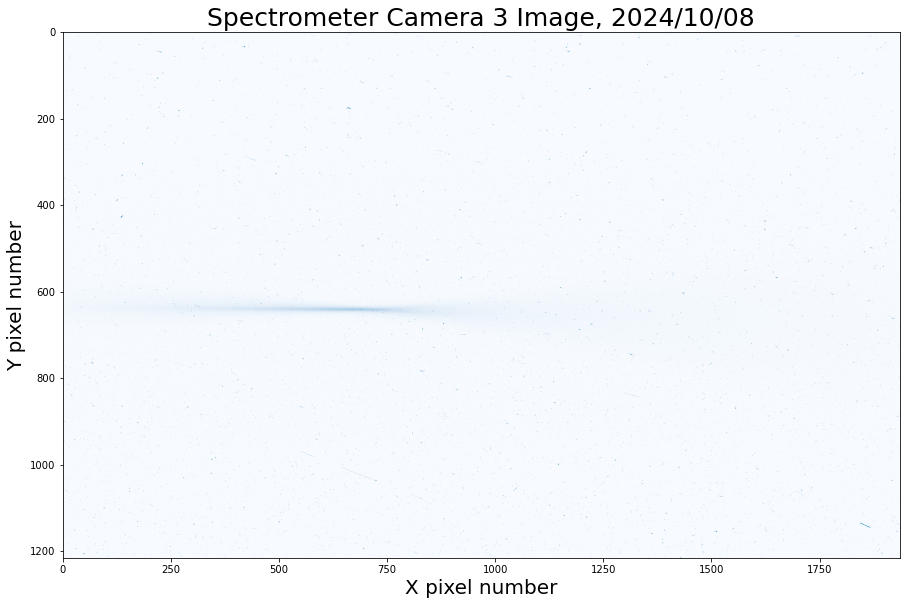

In [17]:
subtract_sensor('2024/10/08',248,3,3.78126279)

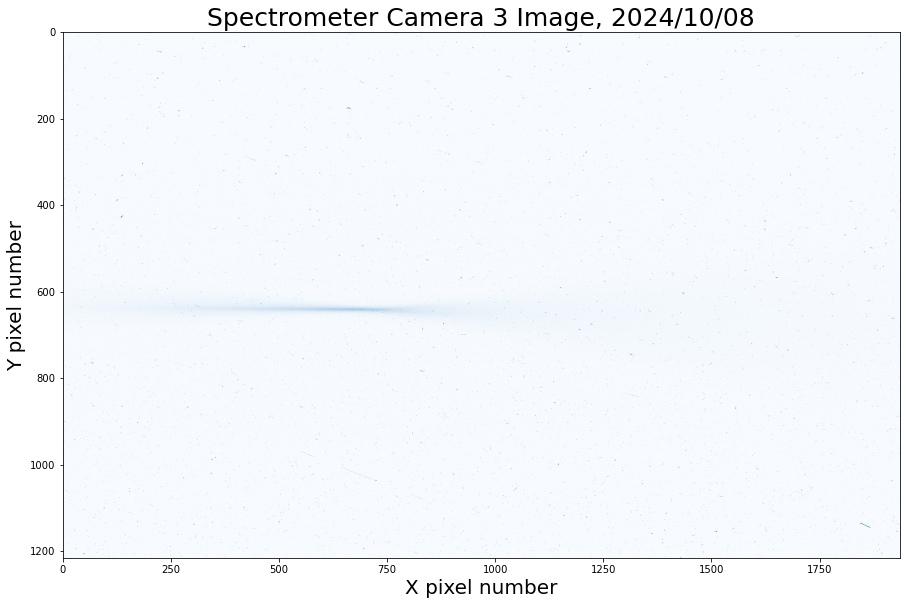

In [18]:
subtract_sensor('2024/10/08',248,3,0)